In this notebook we analyze the globular clusters from the [catalog](https://physics.mcmaster.ca/~harris/mwgc.dat) by William E. Harris, from McMaster University. The article from this catalog is [A Catalog Of Parameters For Globular Clusters In The Milky Way](https://arxiv.org/pdf/1012.3224.pdf).

We are using two tables in this study. In the Table 1: Identifications and Positional Data, we have the following informations to respect to the clusters:

(1) Cluster identification number,
(2) Other commonly used cluster name,
(3,4) Right ascension and declination (epoch J2000),
(5,6) Galactic longitude and latitude (degrees),
(7) Distance from Sun (kiloparsecs),
(8) Distance from Galactic center (kpc), assuming R_0=8.0 kpc,
(9-11) Galactic distance components X,Y,Z in kiloparsecs, in a Sun-centered coordinate system; X points toward Galactic center, Y in direction of Galactic rotation, Z toward North Galactic Pole.

In the Table 2: Metallicity and Photometry, we have the following informations to respect to the clusters:

(1) Cluster identification,
(2) Metallicity [Fe/H],
(3) Weight of mean metallicity; essentially the number of independent [Fe/H] measurements averaged together,
(4) Foreground reddening,
(5) V magnitude level of the horizontal branch (or RR Lyraes),
(6) Apparent visual distance modulus,
(7) Integrated V magnitude of the cluster,
(8) Absolute visual magnitude (cluster luminosity)  M_V,t = V_t - (m-M)V,
(9-12) Integrated color indices (uncorrected for reddening),
(13) Spectral type of the integrated cluster light,
(14) Projected ellipticity of isophotes, e = 1-(b/a).



In [431]:
import numpy as np
import matplotlib.pyplot as plt

In [432]:
from astropy.io import ascii

In [433]:
from astropy import coordinates as coord

In [434]:
from astropy.io import ascii
tbl1 = ascii.read("tabela1")  
tbl2 = ascii.read("tabela2")  
tbl3 = ascii.read("tabela3") 

In [462]:
#print(tbl2)

In [323]:
kk = np.where(tbl1["ID"]=="NGC 5139")
jj = np.where(tbl1["ID"]=="NGC 6715")

In [326]:
tbl1["ID"][kk]
tbl1["ID"][jj]

NGC 6715


In [327]:
print(kk)
print(jj)

(array([28]),)
(array([133]),)


In [273]:
#reading romualdo's data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data from the file into a Pandas DataFrame
dados = '/home/usuario/Documents/Notebooks/ClusterTopic/all_data_r'  # Adjust the filename as needed
df = pd.read_csv(dados)

df_= df[~np.isnan(df['Fe_H'])]
df_Mv= df[~np.isnan(df['M_V_t'])]
#df_Mv

In [465]:
vel = tbl3['v_r']
Z = tbl1["Z"]
R_gc = tbl1["R_gc"]
Fe_H = tbl2["[Fe/H]"]
r_c = tbl3["r_h"]
M_V_t = tbl2["M_V_t"]

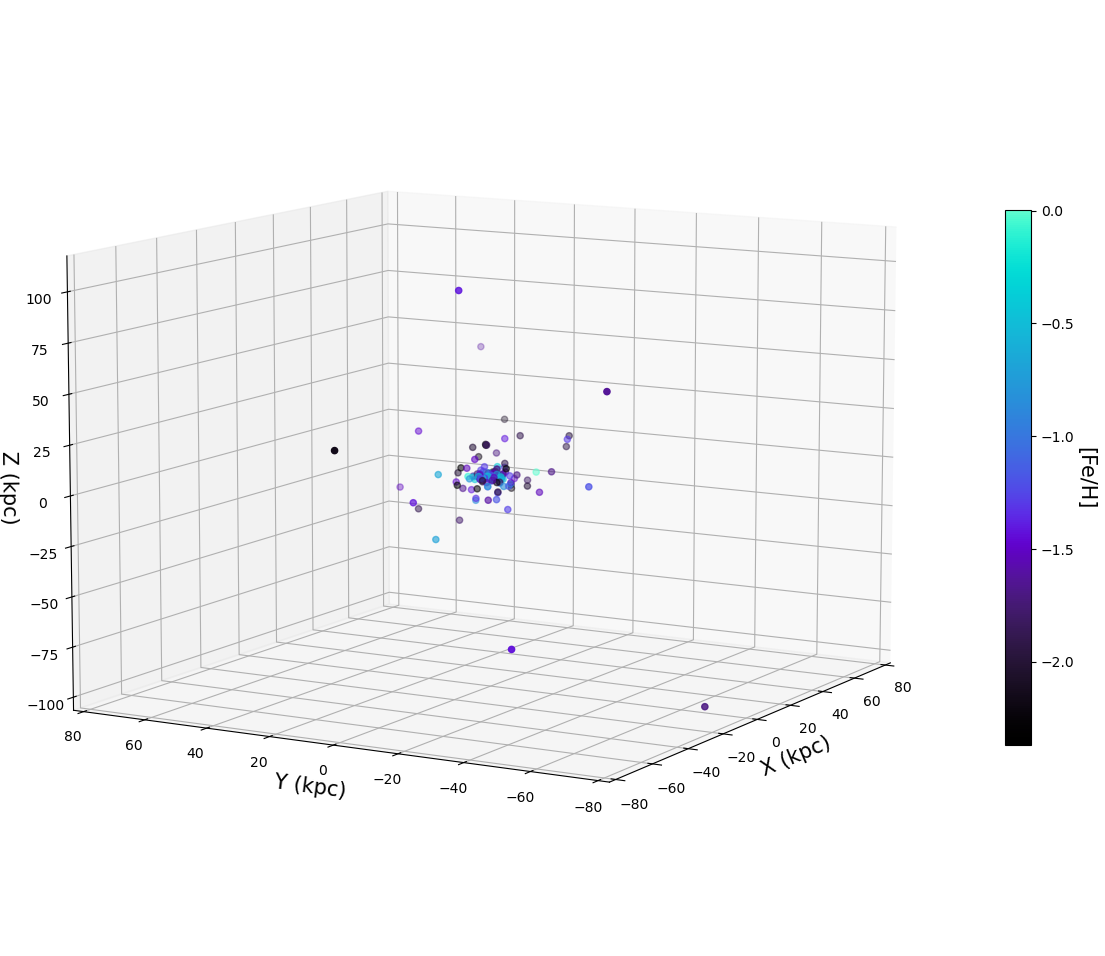

In [455]:
from mpl_toolkits.mplot3d import axes3d
import cmasher as cmr
#plotting X, Y, Z
#%matplotlib inline



fig = plt.figure(tight_layout = True,figsize=(12,11))
ax = fig.add_subplot(111,projection='3d')

#ax.set_title("Posição dos Aglomerados Globulares na Galáxia", fontsize=15)
img = ax.scatter(tbl1["X"]-8, tbl1["Y"], tbl1["Z"],marker='o', c=Fe_H, cmap=cmr.cosmic)
#img2 = ax.scatter(tbl1["X"], tbl1["Y"], tbl1["Z"],color='r')
ax.view_init(10, -150)
#ax.view_init(10, 90)
ax.set_xlabel("X (kpc)",fontsize=15)
ax.set_ylabel("Y (kpc)",fontsize=15)
ax.set_zlabel("Z (kpc)",fontsize=15)
ax.set_ylim(-80,80)
ax.set_xlim(-80,80)
cbar = plt.colorbar(img,orientation="vertical",shrink=0.5)
cbar.set_label("[Fe/H]",fontsize=15, labelpad=15, rotation=270)
#plt.savefig("dist1_galaxy.png", dpi=150)

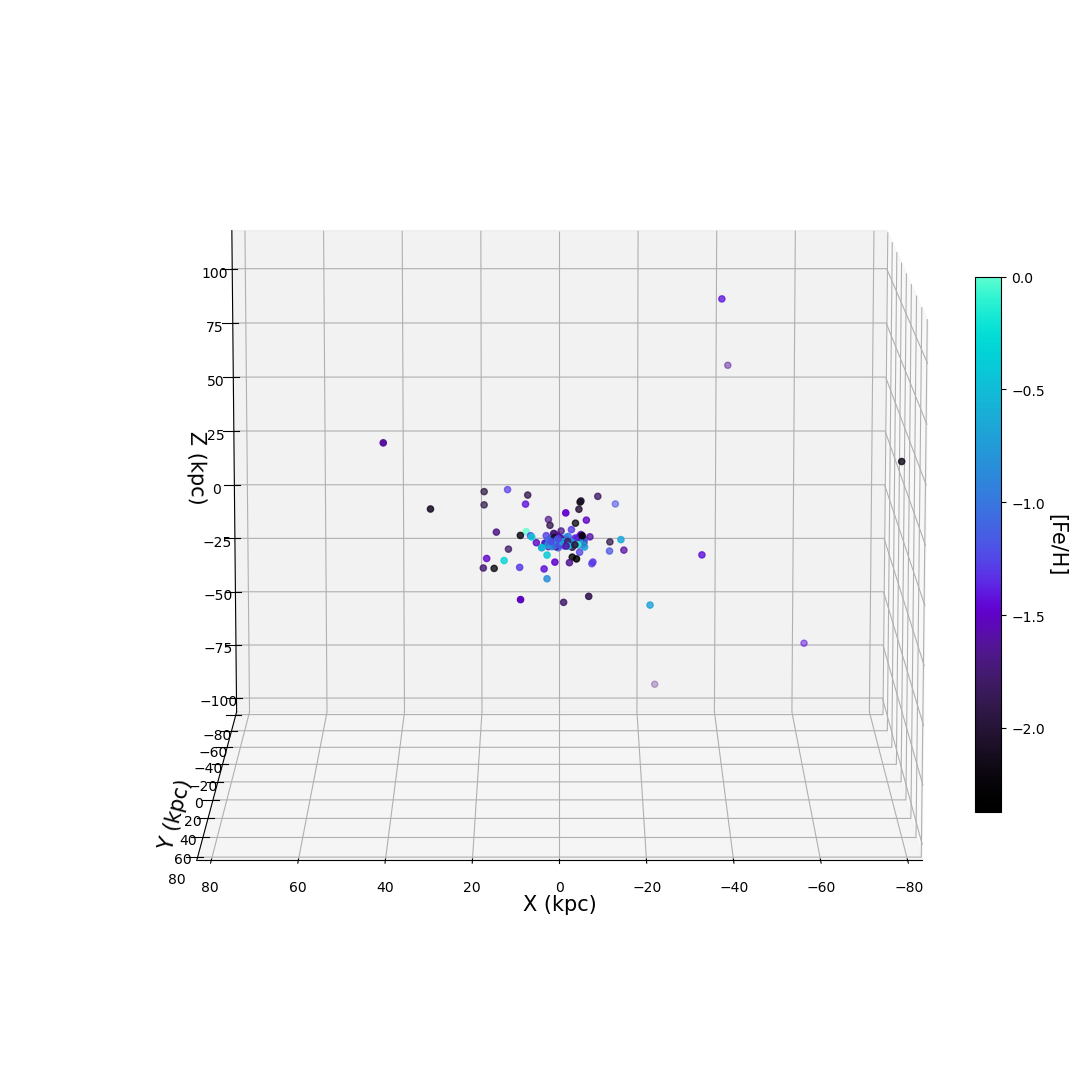

In [456]:
from mpl_toolkits.mplot3d import axes3d
import cmasher as cmr
#plotting X, Y, Z
#%matplotlib inline



fig = plt.figure(tight_layout = True,figsize=(12,11))
ax = fig.add_subplot(111,projection='3d')

img = ax.scatter(tbl1["X"]-8, tbl1["Y"], tbl1["Z"],marker='o', c=Fe_H, cmap=cmr.cosmic)
#img2 = ax.scatter(tbl1["X"], tbl1["Y"], tbl1["Z"],color='r')
#ax.view_init(10, -150)
ax.view_init(10, 90)
ax.set_xlabel("X (kpc)",fontsize=15)
ax.set_ylabel("Y (kpc)",fontsize=15)
ax.set_zlabel("Z (kpc)",fontsize=15)
ax.set_ylim(-80,80)
ax.set_xlim(-80,80)
#cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img,orientation="vertical",shrink=0.5,pad=-0.09)
cbar.set_label("[Fe/H]",fontsize=15, labelpad=15, rotation=270)

#plt.savefig("dist2_galaxy.png", dpi=150)

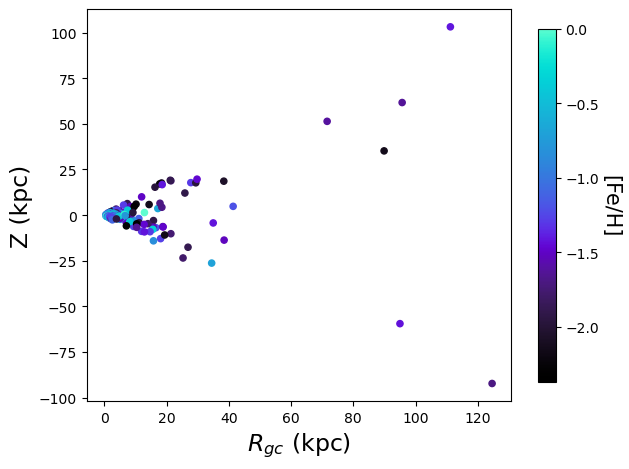

In [457]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(tbl1["R_gc"], tbl1["Z"], c=Fe_H, cmap=cmr.cosmic,s=20)
ax1.set_ylabel("Z (kpc)",fontsize=17)
ax1.set_xlabel(r"$R_{gc}$ (kpc)",fontsize=17)
#ax1.set_title("Position of the clusters in the Galaxy")
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("[Fe/H]",fontsize=15,rotation=270, labelpad=15)
#plt.savefig("dist4_galaxy.png", dpi=150)


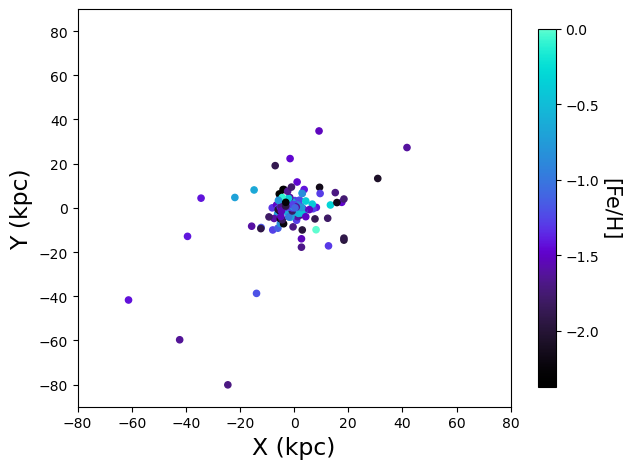

In [460]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(tbl1["X"]-8, tbl1["Y"], c=Fe_H, cmap=cmr.cosmic,s=20)
ax1.set_ylabel("Y (kpc)",fontsize=17)
ax1.set_xlabel("X (kpc)",fontsize=17)
ax1.set_ylim(-90,90)
ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("[Fe/H]",fontsize=15, rotation=270, labelpad=15)
#plt.savefig("dist3_galaxy.png", dpi=150)


Romualdo's data is treated as dataset from Pandas and the way it deals with nan values is different. My data, which is a table readed by Astropy counts the nan values as 0. Even when I force it to be a nan value. Next time use pandas.

## Histrogram

In [235]:
#double gaussian function
def gaussian(x, a1, mu1, sigma1):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi)))

def double_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi)) +
            a2 * np.exp(-(x - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi)))

#### Metalicity

In [241]:
hist, bin_edges = np.histogram(df_['Fe_H'], bins=28)

\begin{equation}
    g(x) = g_1(x) + g_2 (x) = \frac{1}{\sigma_1 \sqrt{2\pi}} exp \left ( -\frac{1}{2} \frac{(x-\mu_1)^2}{\sigma_1^2}\right ) + \frac{1}{\sigma_2 \sqrt{2\pi}} exp \left ( -\frac{1}{2} \frac{(x-\mu_2)^2}{\sigma_2^2}\right )
\end{equation}


In [242]:
# take the centers of the bins in Fe/H
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# parameters
initial_guess = [1, np.mean(df_['Fe_H']), np.std(df_['Fe_H']), 1, np.mean(df_['Fe_H']), np.std(df_['Fe_H'])]

# adjust the gaussians
params, _ = curve_fit(double_gaussian, bin_centers, hist, p0=initial_guess)

In [243]:
params

array([ 2.2078172 , -1.50074475,  0.09531354,  0.28750953, -0.50716447,
        0.0201742 ])

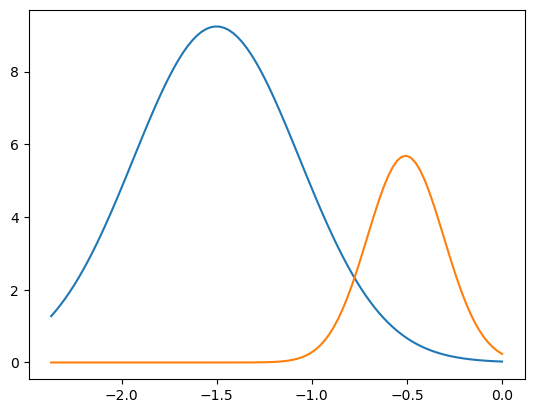

In [248]:
a1,mu1,sigma1= 2.2078172 , -1.50074475, 0.09531354
a2,mu2,sigma2= 0.28750953, -0.50716447, 0.0201742

x = x_r
gaus1=a1 * np.exp(-(x - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))
gaus2=a2 * np.exp(-(x - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi))

#plt.plot(x,gaus1)
#plt.plot(x,gaus2)

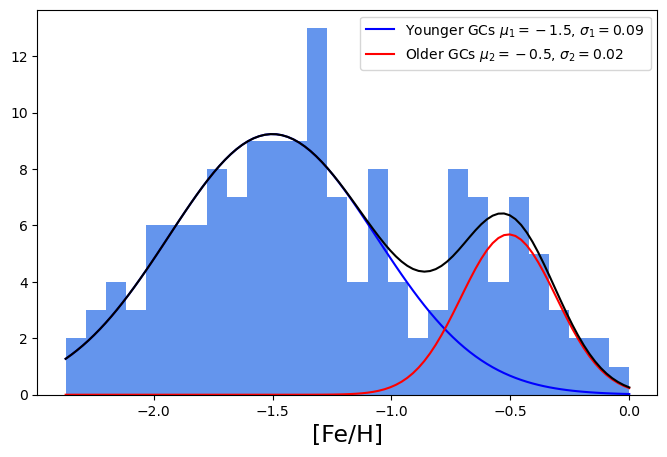

In [250]:
#histogram of metallicity
%matplotlib inline

x_r = np.linspace(min(df_['Fe_H']), max(df_['Fe_H']), 100)

num_bins=28
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df['Fe_H'],num_bins,color="cornflowerblue")
ax.plot(x,gaus1,color='b',label=r"Younger GCs $\mu_1 =-1.5$, $\sigma_1= 0.09$ ")
ax.plot(x,gaus2,color='r',label=r"Older GCs $\mu_2 =-0.5$, $\sigma_2= 0.02$ ")
ax.plot(x_r, double_gaussian(x_r, *params), 'k')
ax.set_xlabel("[Fe/H]",fontsize=17)
fig.legend(fontsize=10,bbox_to_anchor=(0.9, 0.88))
#plt.savefig("hist_feh.png", dpi=150)

#### Total Luminosity (M_V_t)

In [252]:
hist, bin_edges = np.histogram(df_Mv["M_V_t"], bins=49)

In [253]:
x_r = np.linspace(min(df_Mv['M_V_t']), max(df_Mv['M_V_t']), 100)

In [254]:
# take the centers of the bins in Fe/H
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# parameters
initial_guess = [1, np.mean(df_Mv['M_V_t']), np.std(df_Mv['M_V_t'])]

# adjust the gaussians
params, _ = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)

In [255]:
params

array([19.42902385, -7.28944172,  0.85716758])

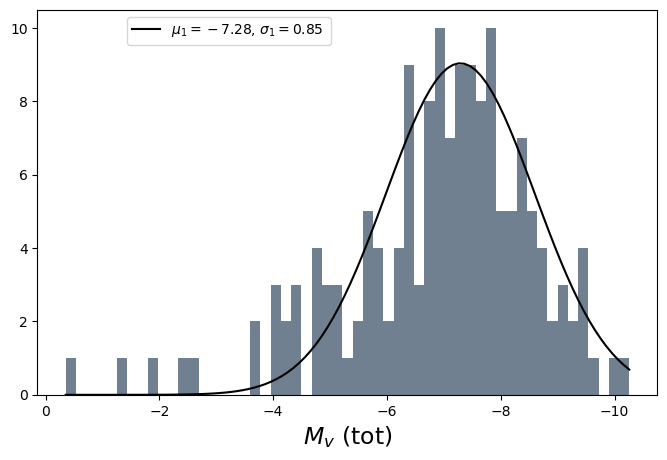

In [257]:
#histogram of metallicity
%matplotlib inline

num_bins=55
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df_Mv['M_V_t'],num_bins, color="slategray")
ax.set_xlabel(r"$M_v$ (tot)",fontsize=17)
#ax.plot(x,gaus1,color='b',label=r"Younger GCs $\mu_1 =-7.45$, $\sigma_1= 0.3$ ")
#ax.plot(x,gaus2,color='r',label=r"Older GCs $\mu_2 =-6.86$, $\sigma_2= 2.12$ ")
ax.plot(x_r, gaussian(x_r, *params), 'k',label=r"$\mu_1 = -7.28$, $\sigma_1= 0.85$ ")
plt.gca().invert_xaxis()
fig.legend(fontsize=10,bbox_to_anchor=(0.5, 0.88))
#plt.savefig("hist_Mvt.png", dpi=150)

#### Half-Light Radii

In [264]:
hist, bin_edges = np.histogram(r_c, bins=27)

In [265]:
x_r = np.linspace(min(r_c), max(r_c), 100)

In [266]:
# take the centers of the bins in Fe/H
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# parameters
initial_guess = [1, np.mean(r_c), np.std(r_c)]

# adjust the gaussians
params, _ = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)

In [267]:
params

array([5.78942996, 0.79741165, 0.10786626])

TÁ EM ARCOMINUTOS! TRANSFORMAR!

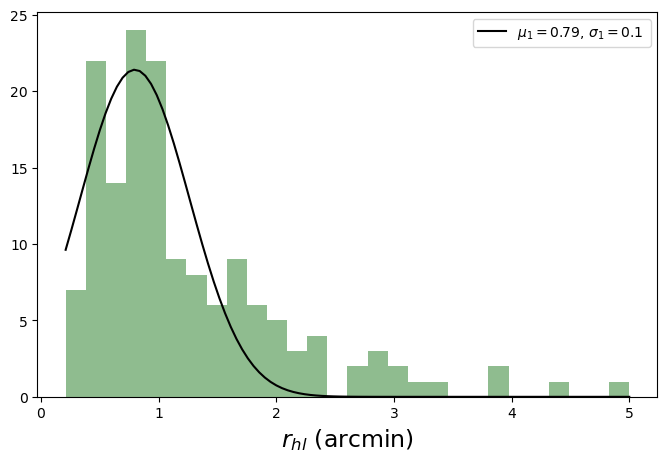

In [271]:
#histogram of metallicity
%matplotlib inline

num_bins=28
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(r_c,num_bins,color="darkseagreen")
ax.plot(x_r, gaussian(x_r, *params), color='k',label=r"$\mu_1 =0.79$, $\sigma_1= 0.1$ ")
ax.set_xlabel(r"$r_{hl}$ (arcmin)",fontsize=17)
fig.legend(fontsize=10,bbox_to_anchor=(0.9, 0.88))
#plt.savefig("hist_rhl.png", dpi=150)

# Testing Correlations

#### Metalicity vs Luminosity V (horizontal-branch)

In [134]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(tbl2["[Fe/H]"],  tbl2["V_HB"])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.72 -1.32 -1.26 -0.7  -1.27 -0.65 -1.7  -1.43 -1.42 -1.18 -1.6  -1.92
 -2.15  0.   -1.2  -1.14 -0.83 -1.63 -1.59 -1.41  0.   -1.8  -2.17 -1.68
 -2.23 -1.85 -2.1  -2.27 -1.53 -1.5  -1.69 -1.3  -1.98 -1.88 -1.98 -1.53
 -1.91 -1.41 -1.9  -1.29 -0.49 -1.29  0.   -1.59 -0.67 -1.62 -1.75 -1.16
 -1.98 -1.76 -1.65 -0.74 -1.02 -1.5  -1.53 -1.47 -1.37  0.   -1.28 -1.56
 -1.02 -2.07 -1.18 -1.74 -1.26 -2.1  -1.99 -0.45 -0.45 -2.31 -1.25 -1.77
 -0.55 -0.4  -1.37 -0.64 -1.7  -0.69 -0.59 -1.41 -1.   -0.99 -0.33 -0.75
 -1.03 -0.7  -0.55 -1.28 -1.02 -2.02 -0.91 -2.15 -1.51 -0.23 -0.36 -0.46
 -0.56 -1.5  -0.64 -0.46 -1.05 -0.65 -1.23 -1.   -1.34 -1.79 -0.11 -0.63
 -1.35 -1.4  -1.81  0.   -1.8  -0.18 -1.08 -1.32 -0.75 -0.5  -0.76 -1.3
 -0.33 -1.5  -0.44 -1.32 -0.95 -0.64 -1.26 -0.81 -1.7  -0.37 -1.62  0.
 -1.02 -1.49 -1.26 -1.1  -1.6  -1.54 -0.4  -1.98 -0.32 -0.1  -1.75 -1.94
 -2.16 -0.4  -0.78 -1.29 -1.47 -1.42 -1.52 -2.37 -1.65 -2.27 -0.85 -1.88
 -1.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [470]:
ff = np.where(Fe_H < -0.8) #young clusters
hh = np.where(Fe_H > -0.8) #older clusters

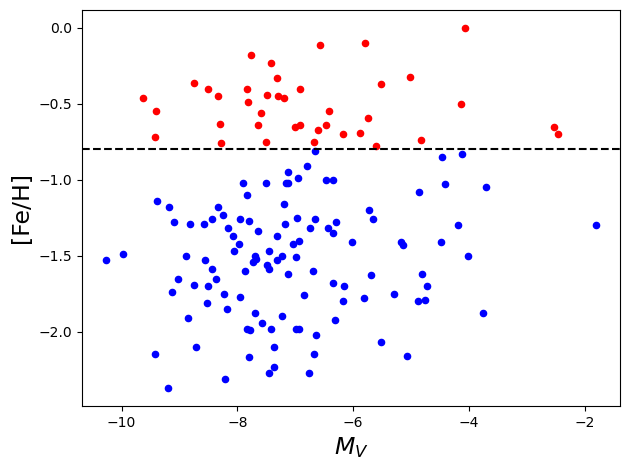

In [480]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(M_V_t[ff], Fe_H[ff],color="b", s=20)
img = ax1.scatter(M_V_t[hh], Fe_H[hh],color="r", s=20)
ax1.set_xlabel(r"$M_V$",fontsize=17)
ax1.set_ylabel("[Fe/H]",fontsize=17)
plt.axhline(y=-0.8,color='k',linestyle="dashed")
#ax1.set_ylim(-2,-10)
#ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("[Fe/H]", rotation=270, labelpad=15)
#plt.savefig("dist_femv.png", dpi=150)

PÔR TÍTULO NAS IMAGENS!

In [ ]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots()

img = ax1.scatter(R_gc, Fe_H, s=20)
ax1.set_ylabel("[Fe/H]",fontsize=17)
ax1.set_xlabel("R_gc (kpc)",fontsize=17)
ax1.set_xscale("log")
#ax1.set_ylim(-2,-10)
#ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("[Fe/H]", rotation=270, labelpad=15)

Text(0.5, 0, 'R_gc (kpc)')

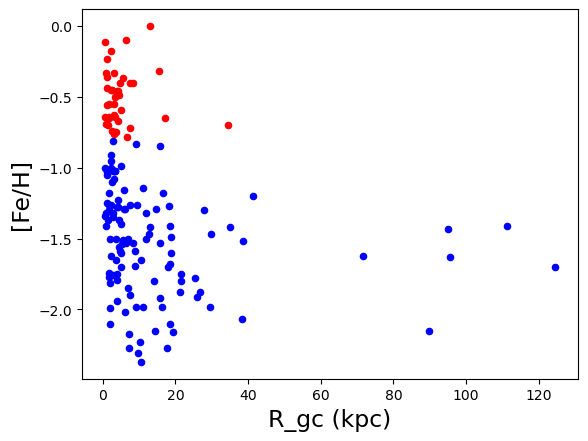

In [482]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots()

ax1.scatter(R_gc[ff], Fe_H[ff],color="b", s=20)
ax1.scatter(R_gc[hh], Fe_H[hh],color="r", s=20)
ax1.set_ylabel("[Fe/H]",fontsize=17)
ax1.set_xlabel("R_gc (kpc)",fontsize=17)
#ax1.set_xscale("log")
#ax1.set_ylim(-2,-10)
#ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("[Fe/H]", rotation=270, labelpad=15)

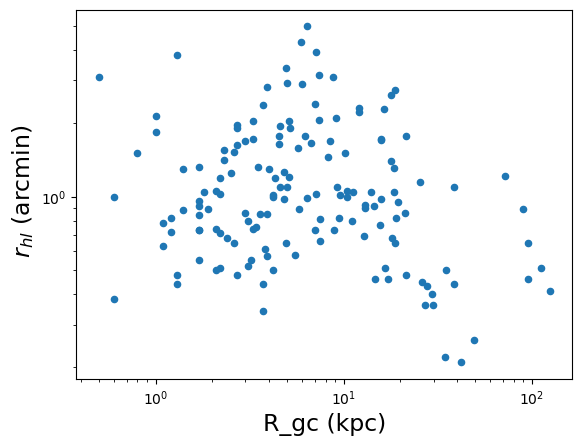

In [300]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots()

img = ax1.scatter(R_gc,r_c, s=20)
ax1.set_ylabel(r" $r_{hl}$ (arcmin)",fontsize=17)
ax1.set_xlabel("R_gc (kpc)",fontsize=17)
ax1.set_xscale("log")
ax1.set_yscale("log")
#ax1.set_ylim(-2,-10)
#ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("[Fe/H]", rotation=270, labelpad=15)


(0.0, -10.0)

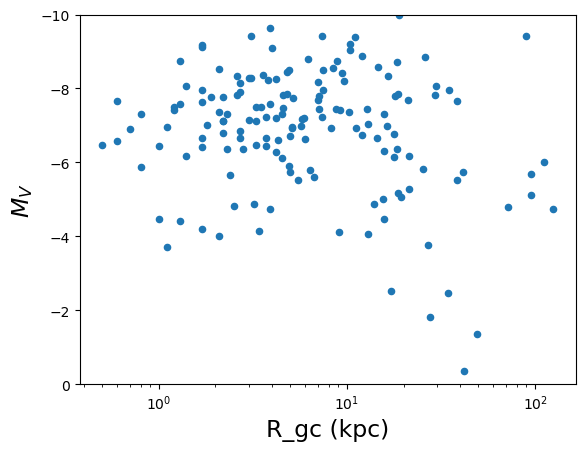

In [305]:
#plotting Z with r_gc with metalicities
%matplotlib inline
fig,ax1 = plt.subplots()

img = ax1.scatter(R_gc, tbl2["M_V_t"], s=20)
ax1.set_xlabel("R_gc (kpc)",fontsize=17)
ax1.set_ylabel(r"$M_V$",fontsize=17)
ax1.set_xscale("log")
ax1.set_ylim(0,-10)
#ax1.set_xlim(-80,80)
#ax1.set_title("Position of the clusters in the Galaxy")
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("[Fe/H]", rotation=270, labelpad=15)


# Analyzing if there are possible spheroidal dwarf galaxies

In [405]:
elips = tbl2["ellip"]

In [406]:
elips = np.delete(elips, kk, axis=0)
elips = np.delete(elips, jj, axis=0)

In [407]:
elips.size

155

Text(0.5, 0, '$(a-b)/a$')

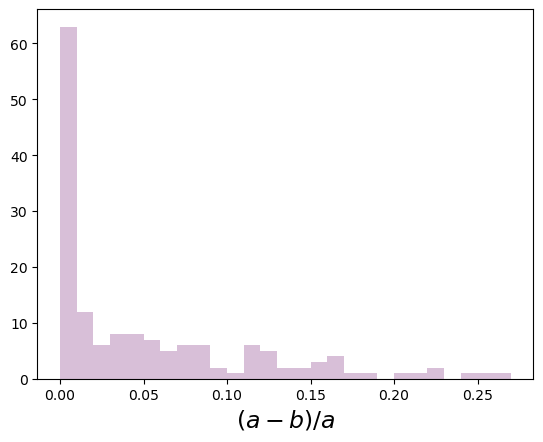

In [408]:
%matplotlib inline

num_bins = 27
fig,ax = plt.subplots()
ax.hist(elips,num_bins,color="thistle")
ax.set_xlabel(r"$(a-b)/a$",fontsize=17)
#plt.savefig("hist_ellip.png", dpi=150)

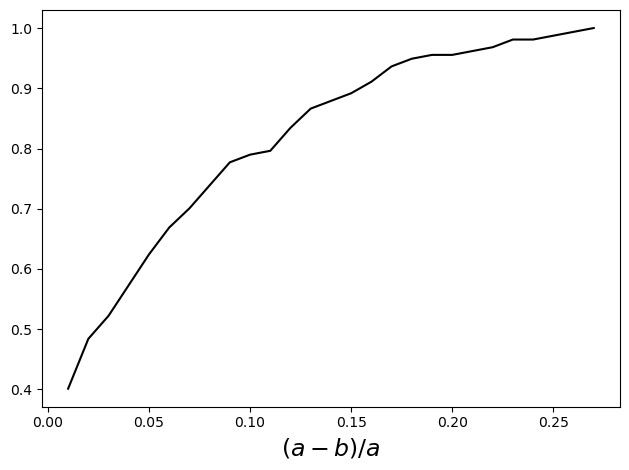

In [489]:
#distribution functions
count, bins_count = np.histogram(elips, num_bins) 

#PDF (Probability Distribution Function)
pdf = count / sum(count) 

#Cumulative distribution function (CDF)
cdf2 = np.cumsum(pdf) 

fig,ax1 = plt.subplots(tight_layout=True)

ax1.plot(bins_count[1:], cdf, color='k') 
ax1.set_xlabel(r"$(a-b)/a$",fontsize=17)
#plt.savefig("cumulative_ellip.png", dpi=150)

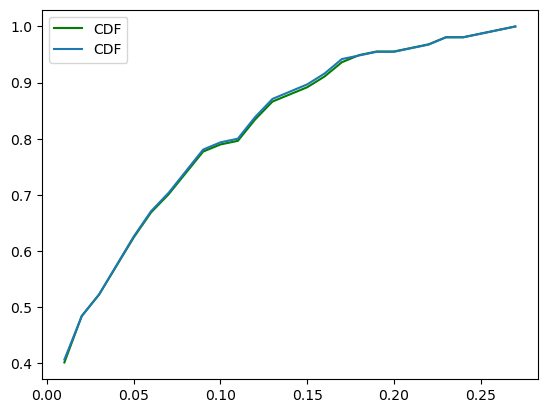

In [412]:
#distribution functions
count, bins_count = np.histogram(tbl2["ellip"], num_bins) 

#PDF (Probability Distribution Function)
pdf = count / sum(count) 

#Cumulative distribution function (CDF)
cdf = np.cumsum(pdf) 

#plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf,color='green', label="CDF") 
plt.plot(bins_count[1:], cdf2, label="CDF") 
#plt.xlim(0,0.27)
plt.legend()